# Project Census Income

Objective : Classify people on the basis of their income

In [1]:
#importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv('CensusData.csv', na_values = '?', skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


3 columns has null value and all 3 are categorical

In [4]:
# we will filling nan value for continuous data with mean or median,
# where will filling categorical data with mode value

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


INFERENCE:

 mean age is 38

 mean hours is around 40



In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,31978,41,United-States,29170
income,32561,2,<=50K,24720


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
print(df['native.country'].unique())
print(df['native.country'].value_counts())

['United-States' nan 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']
native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Re

In [8]:
df['native.country'].nunique()

41

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [10]:
#explore the target
df.income.value_counts(normalize = True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [11]:
df.income.value_counts(normalize = True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [12]:
#education
df.education.value_counts(normalize = True)

education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: proportion, dtype: float64

In [13]:
#occupation
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [14]:
df['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [15]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [16]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

# EDA

In [17]:
df.describe(include = 'object').T

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,31978,41,United-States,29170
income,32561,2,<=50K,24720


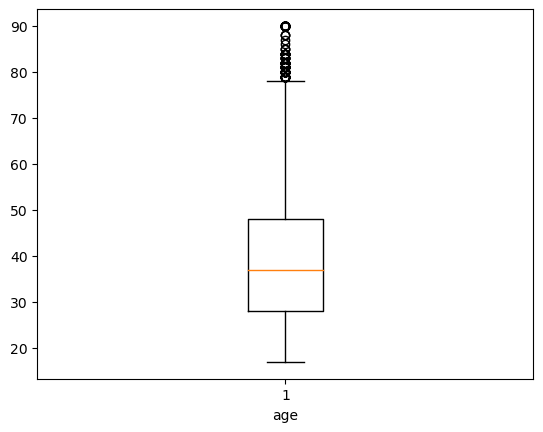

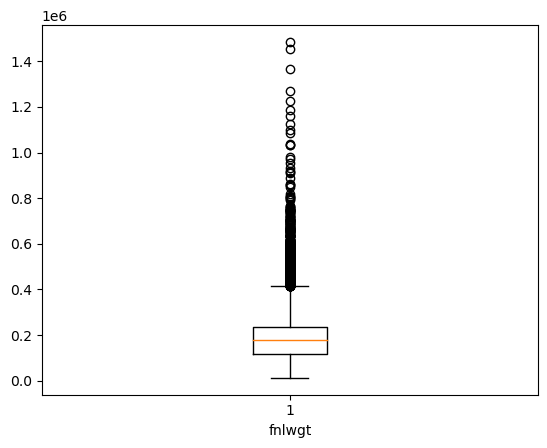

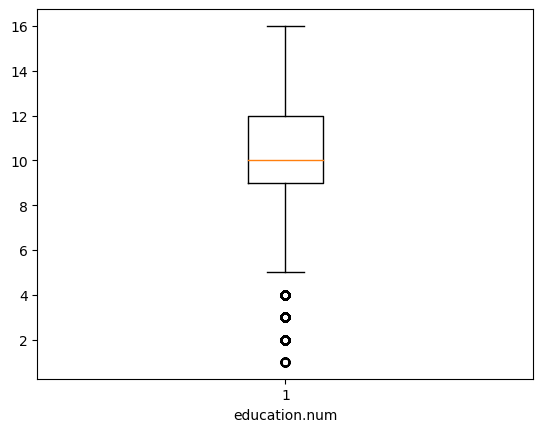

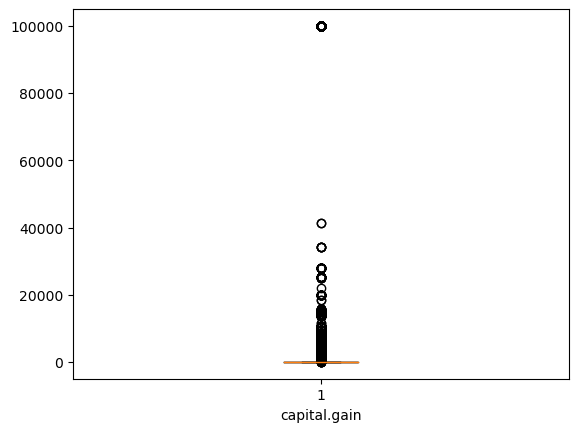

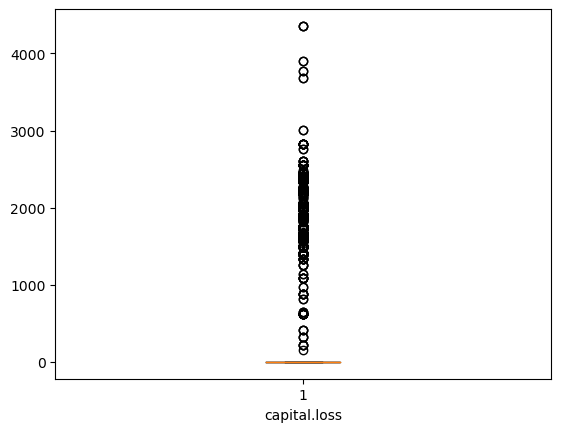

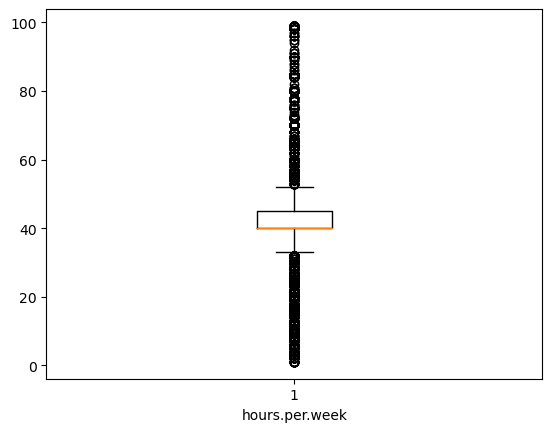

In [18]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [19]:
out_col = ['hours.per.week', 'age', 'fnlwgt', 'education.num']

In [20]:
# outliers elimination
for col in out_col:
  Q1 = df_processed[col].quantile(0.25)
  Q3 = df_processed[col].quantile(0.75)
  # define my IQR
  IQR = Q3 - Q1
  # define UL and LL
  LL = Q1 - 1.5*IQR # lower limit
  UL = Q3 + 1.5*IQR # upper limit

  # formulation
  df_processed = df_processed[(df_processed[col]>=LL) & (df_processed[col]<=UL)]

NameError: name 'df_processed' is not defined

In [ ]:
#null value
df.isna().sum()

In [ ]:
#df.dropna(inplace = True)
#imputer and preprocessing and column transformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

To clean data frame we use transformer and to send our data we use pipeline

In [ ]:
#step 1 Dividing
num_feat = df.select_dtypes(exclude=['object']).columns
cat_feat = df.select_dtypes(include=['object']).columns

In [ ]:
num_feat

In [ ]:
cat_feat

In [ ]:
# step 2 making transformer
num_feat_trans = SimpleImputer(strategy= 'mean')
cat_feat_trans = SimpleImputer(strategy= 'most_frequent') # most frequent is same as mode

In [ ]:
# Step 3: Setting up the transformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_feat_trans, num_feat),
        ('cat', cat_feat_trans, cat_feat),
    ]
)

In [ ]:
# new dataframe that will store the preprocessed data
df_processed = pd.DataFrame(preprocessor.fit_transform(df), columns = list(num_feat)+list(cat_feat))

In [ ]:
df.head()

In [ ]:
df_processed.head()

In [ ]:
df_processed[df_processed.duplicated]
#df_processed.duplicated().sum()

In [ ]:
df_processed.shape

In [ ]:
df_processed.drop_duplicates(inplace = True)

In [ ]:
df_processed.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df_processed.info()

In [ ]:
for col in df_processed.columns:
  df_processed[col] = encoder.fit_transform(df_processed[col])

In [ ]:
# sal greater than 50K as 0 and sal less than 50K as 1
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Class Mapping:", class_mapping)

In [ ]:
df_processed.info()

In [ ]:
df_processed.head()

In [ ]:
df_processed.occupation.value_counts()

In [ ]:
sns.heatmap(df_processed.corr()*100, cmap = 'Greens' ,annot = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_processed.iloc[:,:-1]
y = df_processed.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = .30, random_state = 28)

### Logistic Regression

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
le = LogisticRegression()
le.fit(x_train, y_train)

In [ ]:
pred_le = le.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(pred_le, y_test)*100)

In [ ]:
confusion_matrix(pred_le, y_test)

### Decision Tree

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train, y_train)

In [ ]:
pred_dt = dt.predict(x_test)

In [ ]:
print(accuracy_score(pred_dt, y_test)*100)
print(confusion_matrix(pred_dt, y_test))

### Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [ ]:
print(accuracy_score(pred_rf, y_test)*100)
print(confusion_matrix(pred_rf, y_test))

### Support Vector Classifier (SVC)

In [ ]:
#SVC
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

In [ ]:
print(accuracy_score(pred_svc, y_test)*100)
print(confusion_matrix(pred_svc, y_test))

### XGBoost

In [ ]:
!pip3 install xgboost

In [ ]:
#XGboosting
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [ ]:
xgb.fit(x_train, y_train)

In [ ]:
pred_xbg = xgb.predict(x_test)

In [ ]:
print(accuracy_score(pred_xbg, y_test)*100)
print(confusion_matrix(pred_xbg, y_test))

### XGBoost is the best model

In [ ]:
# Predicting User Input 1
user_input_1 = [[21, 5840, 3, 0, 78, 7, 3, 0, 5, 0, 4, 4, 1, 38]]

# Make predictions
user_prediction = xgb.predict(user_input_1)

# Display the prediction
if user_prediction[0] == 0:
    print("The model predicts that the employee salary is greater than or equal to 50K.")
else:
    print("The model predicts that the employee salary is less than 50K.")

In [ ]:
le.classes_